In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 코랩에서 한글 사용할 때

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치후 런타임 재시작 필요

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings 
warnings.filterwarnings('ignore')

### 가상의 분류 데이터를 생성 
1. make_classification
2. make_blobs

In [16]:
# plt import, 한글 설정
from matplotlib import font_manager as fm, rc
font = fm.FontProperties(fname="C:\Windows\Fonts\gulim.ttc").get_name()
rc('font', family=font)

#### 1. make_classification

In [31]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)

- **n_samples** : data의 수, 기본값은 100 
- **n_features** : feature의 수, 기본값은 20  
- n_informative : 독립변수중 종속변수와 상관관계가 있는 성분의 수(y와 관련이 있는 x의 수), 기본값은 2 (=proba가 높을 변수)
- n_redundant : 다른 독립변수들의 선형조합으로 만들어지는 독립변수의 수(다른 x들의 선형조합으로 만들어 지는 x의 수), 기본값은 2  
- n_repeated : 중복되는 독립변수의 수, 기본값은 0, 독립변수란 입력값 X를 말한다.   
- **n_classes** : 종속변수의 class 수, 기본값은 2  
- **n_clusters_per_class** : 각 클래스당 클러스터 수, 기본값은 2, 클래스당 클러스터 수를 늘리게 되면 클래스 끼리 잘 분리되지 않은 상태의 데이터를 생성하게 된다., 주의 사항으로 n_classes * n_clusters_per_class는 2 ** n_informative보다 작거나 같게 설정해야 한다. 
- random_state : 난수 발생, 난수값을 다르게하면 각자 다른 형태의 데이터가 나오게 된다.(=시드)

In [8]:
X.shape, y.shape, y[:5]

((100, 2), (100,), array([0, 0, 1, 0, 1]))

#### 2. make_blobs

In [98]:
from sklearn.datasets import make_blobs

In [ ]:
dir(make_blobs)

In [106]:
X,y = make_blobs(n_samples = 400, centers= 2, random_state = 33)

In [107]:
X.shape, y.shape

((400, 2), (400,))

In [108]:
X[:5], y[:5]

(array([[-5.700627  , -2.17094551],
        [-3.06818436, -3.56022105],
        [-0.51877132, -5.51203852],
        [-5.04608375,  0.0437252 ],
        [-4.20842605, -1.49427197]]),
 array([0, 1, 1, 0, 0]))

---
### 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
X, y = make_classification(n_samples = 400, n_features = 2, n_redundant = 0,
                          n_informative = 2, n_clusters_per_class = 2,
                          random_state = 30)
# x1, x2 영향을 받으면서 n_cluster가 2이므로 덜 분리된 데이터 나올 것

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   shuffle = True)

model_logic = LogisticRegression().fit(X_train, y_train)

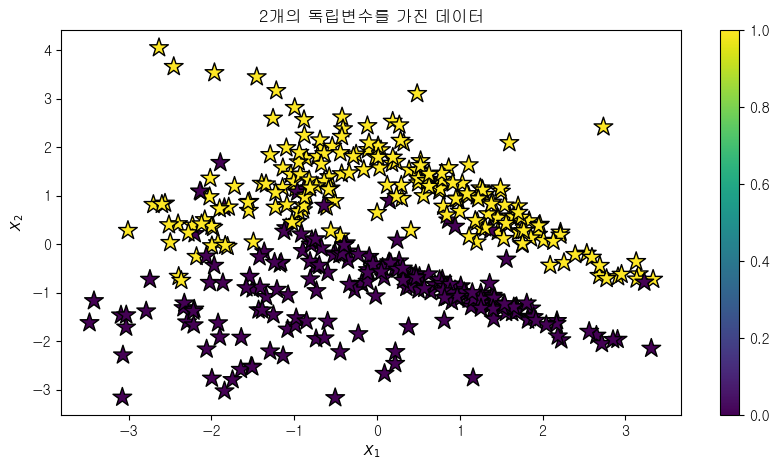

In [34]:
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, edgecolors = 'k', s = 200)
# 가로축에 x1, 세로축에 x2, 그에 대한 y의 값은 color로 표현
plt.title('2개의 독립변수를 가진 데이터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

In [38]:
print('weight : {}'.format(model_logic.coef_))
print('bias : {}\n'.format(model_logic.intercept_))

print('train score : {:.3f}'.format(model_logic.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_logic.score(X_test, y_test)))

weight : [[0.54137263 3.02927256]]
bias : [-0.00131722]

train score : 0.916
test score : 0.875


In [40]:
# X_test에 대한 예측 결과
y_pred = model_logic.predict(X_test)

In [42]:
X_test.max(), X_test.min()

(3.4527133471027276, -3.4718879169753696)

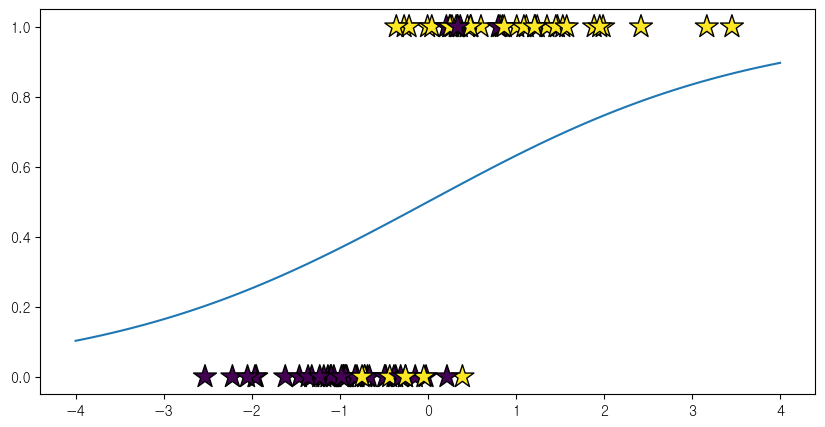

In [45]:
plt.figure(figsize = (10,5))

dot_x = np.linspace(-4, 4, 100)
# -4 에서 4까지 50개의 균일한 간격으로 나눈 점을 생성

log_func = 1.0/(1 + np.exp(-model_logic.coef_[0][0]*dot_x - model_logic.intercept_[0]))
# 로지스틱 함수

plt.plot(dot_x, log_func)
plt.scatter(X_test[:, 1], model_logic.predict(X_test), marker = '*', c = y_test, 
            edgecolors = 'k', s = 300)
# x2만 표현
plt.show()

---
### 2. Support Vector Machine(SVM)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

SVC의 매개변수  
- kernel : 커널을 설정한다, 기본값은 'rbf'  
'rbf'가 무엇인지 왜 기본값인지. (radial basis function)
- C : 슬랙 변수 가중치(slack variable weight) 즉, 모델의 오차 혀용률을 조절한다, 기본값은 1.0
- C는 얼마나 많은 데이터 샘플들을 다른 클래스에 놓이는 것을 허용하는지를 정해준다.
- 높은 C값은 모델을 더 유연하게 만들어주는 반면에, 낮은 C값은 모델을 더 안정적으로 만들어줌.  
낮은 C값을 가지면 더 많은 Support_Vector 가짐, 과적합의 경우 C값 줄여보기

#### 모델.fit
- SVC(kernel = 'linear', C = 1)
- linear_svc.support_vectors_
- linear_svc.decision_function

In [78]:
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0,
                            n_informative = 1, n_classes = 2, 
                            n_clusters_per_class = 1, random_state = 30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   shuffle = True)

In [79]:
linear_svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

In [80]:
linear_svc.n_support_ # 각 클래스의 서포트의 개수, support vector의 개수

array([11, 11])

In [ ]:
linear_svc.support_vectors_ # 각 클래스의 서포트 x값 (x+. x-)

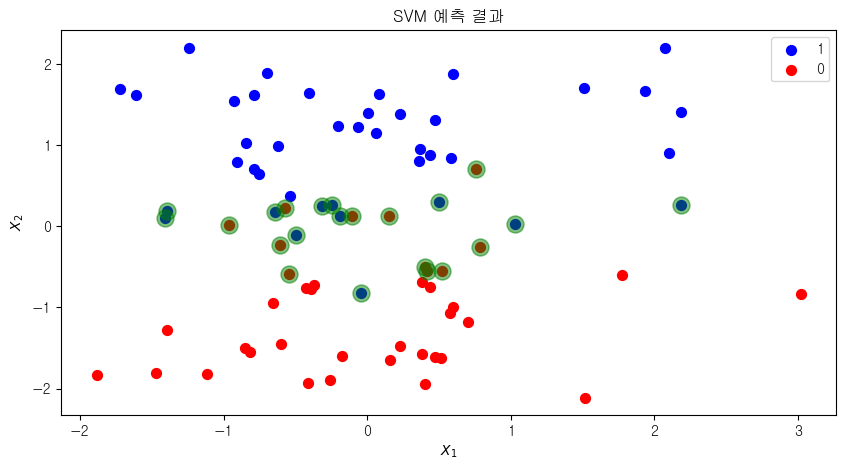

In [82]:
plt.figure(figsize = (10,5))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s=50)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train ==0, 1], c = 'r', label = '0', s=50)
plt.scatter(linear_svc.support_vectors_[:, 0], linear_svc.support_vectors_[:, 1],
           s = 150, c = 'g', alpha = 0.5)
# alpha는 투명도, support_vector 표시
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [87]:
print('train score : {}'.format(linear_svc.score(X_train, y_train)))
print('test score : {}'.format(linear_svc.score(X_test, y_test)))

train score : 0.9
test score : 0.9


In [92]:
linear_svc.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [91]:
linear_svc.decision_function(X_test)
# class가 두개인 경우 음수, 양수로 결정
# 세개 이상인 경우 X_test의 X마다 class별 점수 보여줌

array([-0.66325374,  2.13807139, -0.08084102,  0.79456092, -2.16167804,
        1.89684608, -3.72960442,  0.44097963, -1.33054234,  1.93509228,
       -1.69729519,  0.72433838, -1.06919351, -0.41830723,  1.95295602,
       -0.92129258, -0.08225205, -0.70825206, -0.55570349, -2.15974126])

#### C값 변경해가며 score 확인해보기

In [93]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# C값을 변경해 가면서 각 모델들의 score를 확인하고자 한다.
# 한 번에 확인하기 위해서 C값을 리스트로 저장하고 for문을 이용하여 score를 구했다.
train_score = []
test_score = []

for i in C:
    linear_svm = SVC(kernel = 'linear', C = i).fit(X_train, y_train)
    scoretr = linear_svm.score(X_train, y_train)
    scorete = linear_svm.score(X_test, y_test)
    train_score.append(scoretr)
    test_score.append(scorete)

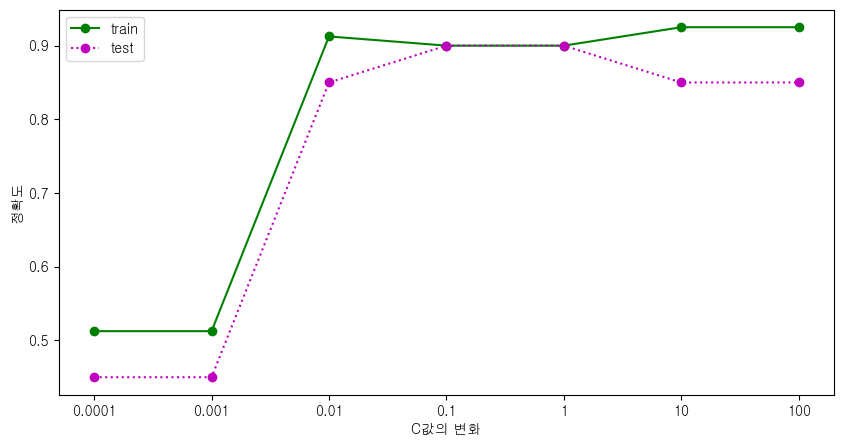

In [94]:
plt.figure(figsize = (10, 5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C)), C)
plt.xlabel('C값의 변화')
plt.ylabel('정확도')
plt.legend(['train', 'test'])
plt.show()

#### sklearn.svm.LinearSVC
- loss를 'hinge'로 설정하고 StandardScaler를 사용하여 스케일을 맞춰준 경우  
 SVC(kernel='Linear')와 같은 역할

In [95]:
from sklearn.svm import LinearSVC
linear_svc2 = LinearSVC(C = 1, loss = 'hinge').fit(X_train, y_train)

In [96]:
print('train score : {}'.format(linear_svc2.score(X_train, y_train)))
print('test score : {}'.format(linear_svc2.score(X_test, y_test)))

train score : 0.9
test score : 0.9


In [ ]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for i in C:
    # SVC -> LinearSVC
    linear_svm = LinearSVC(C = i, loss = 'hinge').fit(X_train, y_train)
    scoretr = linear_svm.score(X_train, y_train)
    scorete = linear_svm.score(X_test, y_test)
    train_score.append(scoretr)
    test_score.append(scorete)
    
plt.figure(figsize = (10, 5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C)), C)
plt.xlabel('C값의 변화')
plt.ylabel('정확도')
plt.legend(['train', 'test'])
plt.show()
# 뭔가 저점이 높은 느낌

Logistic Regression은 확률값으로 WX의 값에 따라 0 ~ 1 사이의 확률값으로 예측해지만 SVM은 확률값이 아닌 1 or 0 으로 예측한다. 

Logistic Regression의 Cost는 Z(Decision Boundary)가 아무리 커져도 0이 되지 않는다. 반면, SVM의 Cost는 Z가 1 or -1인 순간 0이 된다.(이를 Hinge Loss라고 하는데, 비확률적 분류 모델인 SVM의 Cost로 적합하다.)  
- 선형 모델의 주요 매개변수  
회귀 모델은 alpha, LinearSVC와 LogisticRegression은 C 이다.
alpha가 클수록, C가 작을수록 모델은 단순해진다.

LinearSVC()
  - kernel = 'linear'을 갖는 SVC()와 비슷하지만 libsvm이 아닌 liblinear의 관점에서 구현되어 규제와 loss함수 선택에 있어서 유연하며 데이터가 클 경우에 SVC()는 속도가 현저히 느려지기 때문에 LinearSVC()를 사용것을 권장한다.  
  - penalty 매개변수로 규제를 선택할 수 있으며, loss 매개변수로는 loss함수를 선택할 수 있다.  
  - penalty의 기본값은 'l2'  
  - loss의 기본값은 'squared hinge', SVC(kernel = 'linear')와 같은 효과를 위해서는 'hinge'로 설정한다.  
  - 데이터의 스케일을 맞추지 않고 SVC 모델과 비교하게 되면 차이가 크게 난다. StandardScaler를 사용하면 데이터의 스케일을 자동으로 맞춰준다.

In [ ]:
X,y = make_blobs(n_samples = 400, centers= 2, random_state = 33)
X[:, 0]

In [111]:
np.sum(np.square(X[:, 0])), np.sum(np.square(X[:, 1]))

(5997.139810993906, 5434.833843369062)

In [112]:
X[:, 0] = X[:, 0]*100
np.sum(np.square(X[:, 0])), np.sum(np.square(X[:, 1])) 

(59971398.10993906, 5434.833843369062)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

pre_scale = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

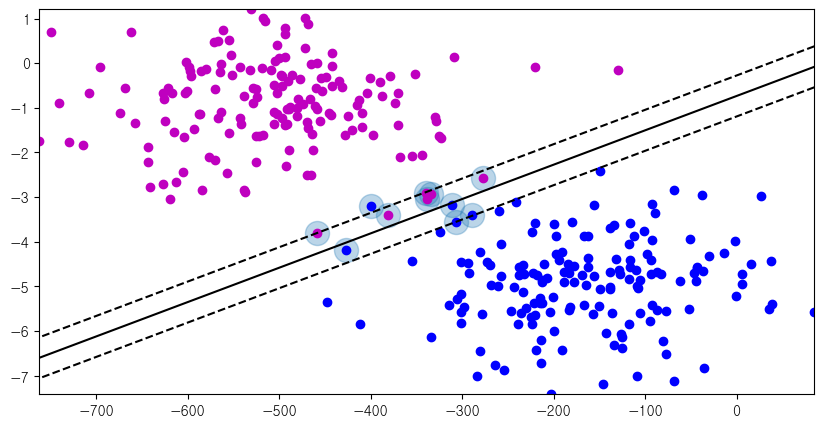

In [114]:
xmin = X_train[:, 0].min()
xmax = X_train[:, 0].max()
ymin = X_train[:, 1].min()
ymax = X_train[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = pre_scale.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
plt.figure(figsize = (10, 5))
plt.plot(X_train[:, 0][y_train == 1], X_train[:,1][y_train == 1], 'bo')
plt.plot(X_train[:, 0][y_train == 0], X_train[:,1][y_train == 0], 'mo')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(pre_scale.support_vectors_[:, 0], 
            pre_scale.support_vectors_[:, 1], s=300, alpha=0.3)

plt.show()

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

np.sum(np.square(X_train[:, 0])), np.sum(np.square(X_train[:, 1]))

(48599923.0305319, 4317.352847639069)

In [116]:
X_scale = scaler.fit_transform(X_train)

np.sum(np.square(X_scale[:, 0])), np.sum(np.square(X_scale[:, 1]))

fit_scale = SVC(kernel = 'linear', C = 1).fit(X_scale, y_train)

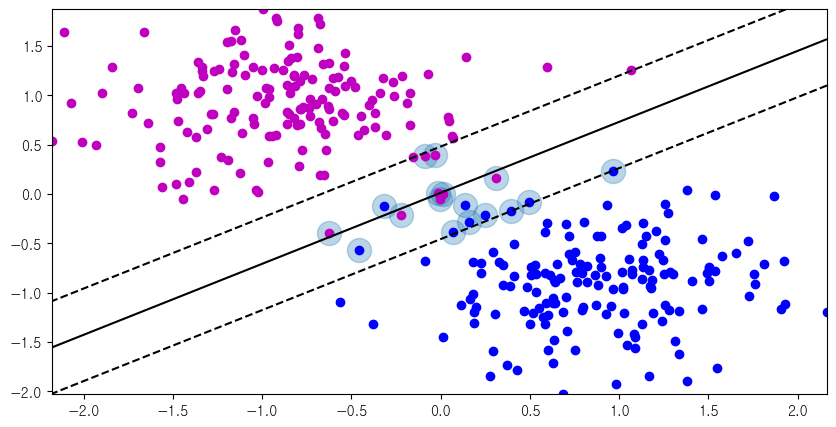

In [117]:
xmin = X_scale[:, 0].min()
xmax = X_scale[:, 0].max()
ymin = X_scale[:, 1].min()
ymax = X_scale[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = fit_scale.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]

plt.figure(figsize = (10, 5))
plt.plot(X_scale[:, 0][y_train == 1], X_scale[:,1][y_train == 1], 'bo')
plt.plot(X_scale[:, 0][y_train == 0], X_scale[:,1][y_train == 0], 'mo')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(fit_scale.support_vectors_[:, 0], 
            fit_scale.support_vectors_[:, 1], s=300, alpha=0.3)

plt.show()

---
### 3. Decision Tree
- DecisionTreeClassifier
- export_graphviz

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
X, y = make_classification(n_samples = 400, n_features = 2, n_redundant = 0,
                          n_informative = 2, n_clusters_per_class = 2,
                          random_state = 30)

In [122]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, 
                                  random_state = 0).fit(X_train, y_train)
# criterion 기본값 'gini', gini 그냥 사용하면 됨

- Decision Tree에서는 일반적으로 훈련을 할 때 제약사항이 없다. 그래서 훈련을 시키면 훈련 데이터에 아주 가깝게 맞추려고 한다. 그러면 자연스럽게 모델은 과적합이 된다. 그래서 트리가 깊어지는 것을 막기 위한 가지치기 작업들이 필요한데 사이킷런에는 과적합을 방지하기위한 파라미터들이 존재한다.  
    - 사전 가지치기
  1. max_depth는 트리의 최대 깊이를 제어할 수 있는 명령어다.  
  2. min_sample_split은 분할되기 위해 노드가 가져야할 최소 샘플 수를 지정한다. 기본값은 2  
  3. min_samples_leaf는 리프노드가 가지고 있어야할 최소 샘플 수를 지정한다. 기본값은 1  
  4. max_feature는 각 노드에서 분할시 사용할 특성의 최대 수를 지정한다.  
  5. max_leaf_node는 리프노드의 최대 수를 지정한다.  

- **그러나 잘 조절해도 과적합 문제 벗어나기 힘듦 -> 앙상블 & 부스팅 사용**

In [127]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree.dot',
                #  class_names = ['y'], feature_names = ['x1', 'x2'],
                 filled = True)

In [125]:
X_train[:5]

array([[-334.59322038,   -2.93470502],
       [ -80.69552159,   -6.22363482],
       [-424.79107471,   -1.17447202],
       [-264.38958241,   -6.76455972],
       [-257.63507531,   -4.04237339]])

In [134]:
import graphviz

In [ ]:
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [136]:
model_dt.feature_importances_

array([0., 1.])

---
### 4. Random Forest(배깅)
- BaggingClassifier
- RandomForestClassifier

In [141]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris

In [154]:
def draw_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

In [142]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   stratify = iris.target,
                                                   shuffle = True)

#### 1. Bagging

BaggingClassfier의 파라미터들  
  - base_estimator : 어떤 모델로 평가를 할 지 정해줄 수 있는 파라미터이다. 값을 지정해주지 않으면 자동적으로 Decision Tree로 실행된다.  
  - n_estimators : 몇 개의 모델을 앙상블해서 훈련시킬지 정해주는 파라미터, 기본값은 10이다.  
  - max_samples : 데이터 중 몇 개의 데이터를 선택할 지 정해주는 파라미터, 기본값은 1.0으로 int형으로 갯수를 지정해줄 수 있고 float형식으로 비율을 정해줄 수 있다.  
  - bootstrap : 데이터의 중복 사용 여부를 정해줄 수 있다. 기본값은 True.  
  - n_jobs : 훈련과 예측에서 사용할 CPU 코어 수를 지정할 수 있다. ( -1로 설정시 가용한 모든 코어 사용)   
  - odd_score : 사용되지 않은 데이터를 가지고 모델을 평가하도록 설정하는 파라미터, 기본값은 True.

In [147]:
model_bag = BaggingClassifier(DecisionTreeClassifier(random_state = 10),
                              n_estimators = 100,
                              max_samples = 40).fit(X_train, y_train)

model_dt = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)

In [144]:
print('배깅을 사용한 경우의 test score : {:.3f}'.format(model_bag.score(X_test, y_test)))
print('결정트리의 test score : {:.3f}'.format(model_dt.score(X_test, y_test)))

배깅을 사용한 경우의 test score : 0.789
결정트리의 test score : 0.763


In [145]:
def model_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.figure(figsize = (10, 5))
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "y^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([4.5, 7.6])
    plt.ylim([2.0, 4.0])
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

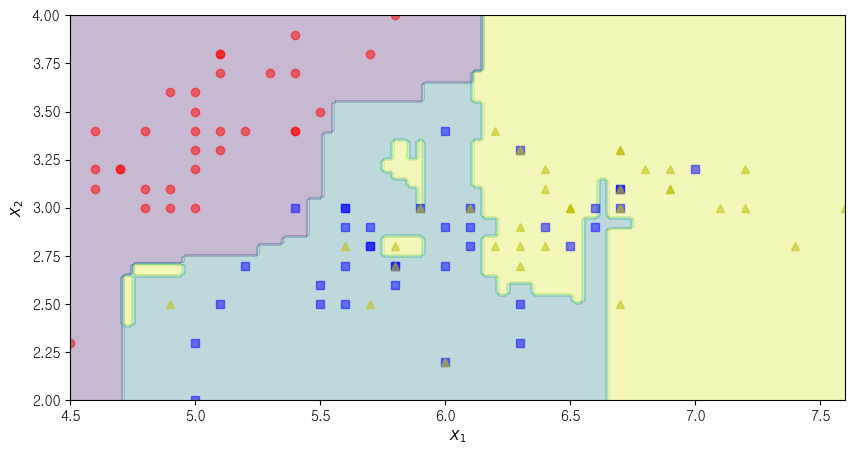

In [146]:
model_border(model_bag, X_train, y_train)
# 경계가 좀 더 스무스함

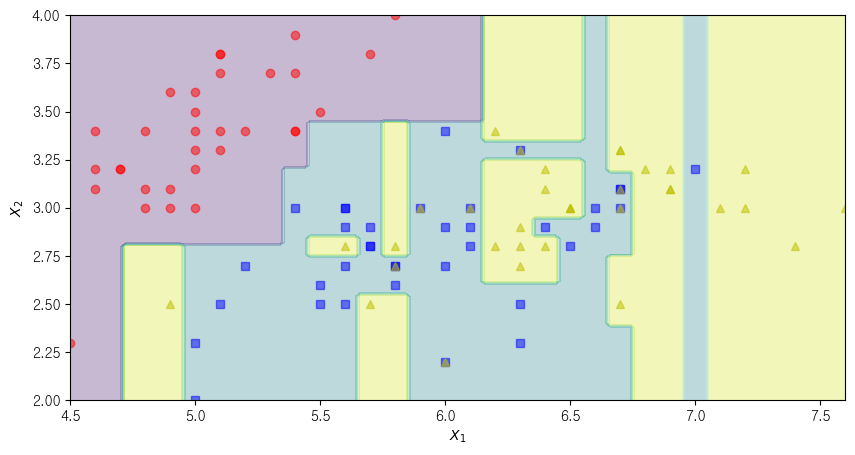

In [148]:
model_border(model_dt, X_train, y_train)

#### 2. 랜덤포레스트

랜덤 포레스트의 파라미터
  - 랜덤 포레스트의 파라미터는 BaggingClassifier와 DecisionTreeClassifier를 제어하는 파라미터를 모두 가지고 있다.(splitter, presort, max_samples, base_estimator를 제외한다.)
  - n_estimators : 트리의 수를 설정한다.(Bagging 과 DecisionTree의 결합이기 때문에)
  - max_features : 각 노드에서 선택하는 특성의 수 (무작위 선택), max_features의 값이 커지면 각 트리들은 비슷해지고, 값을 낮추면 트리들이 서로 많이 달라지고 데이터에 맞추기위해 깊이가 깊어지게 된다.

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
model_rf = RandomForestClassifier(n_estimators = 4, 
                                  random_state = 0).fit(X_train, y_train)

In [152]:
model_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112)]

In [153]:
model_rf.classes_

array([0, 1, 2])

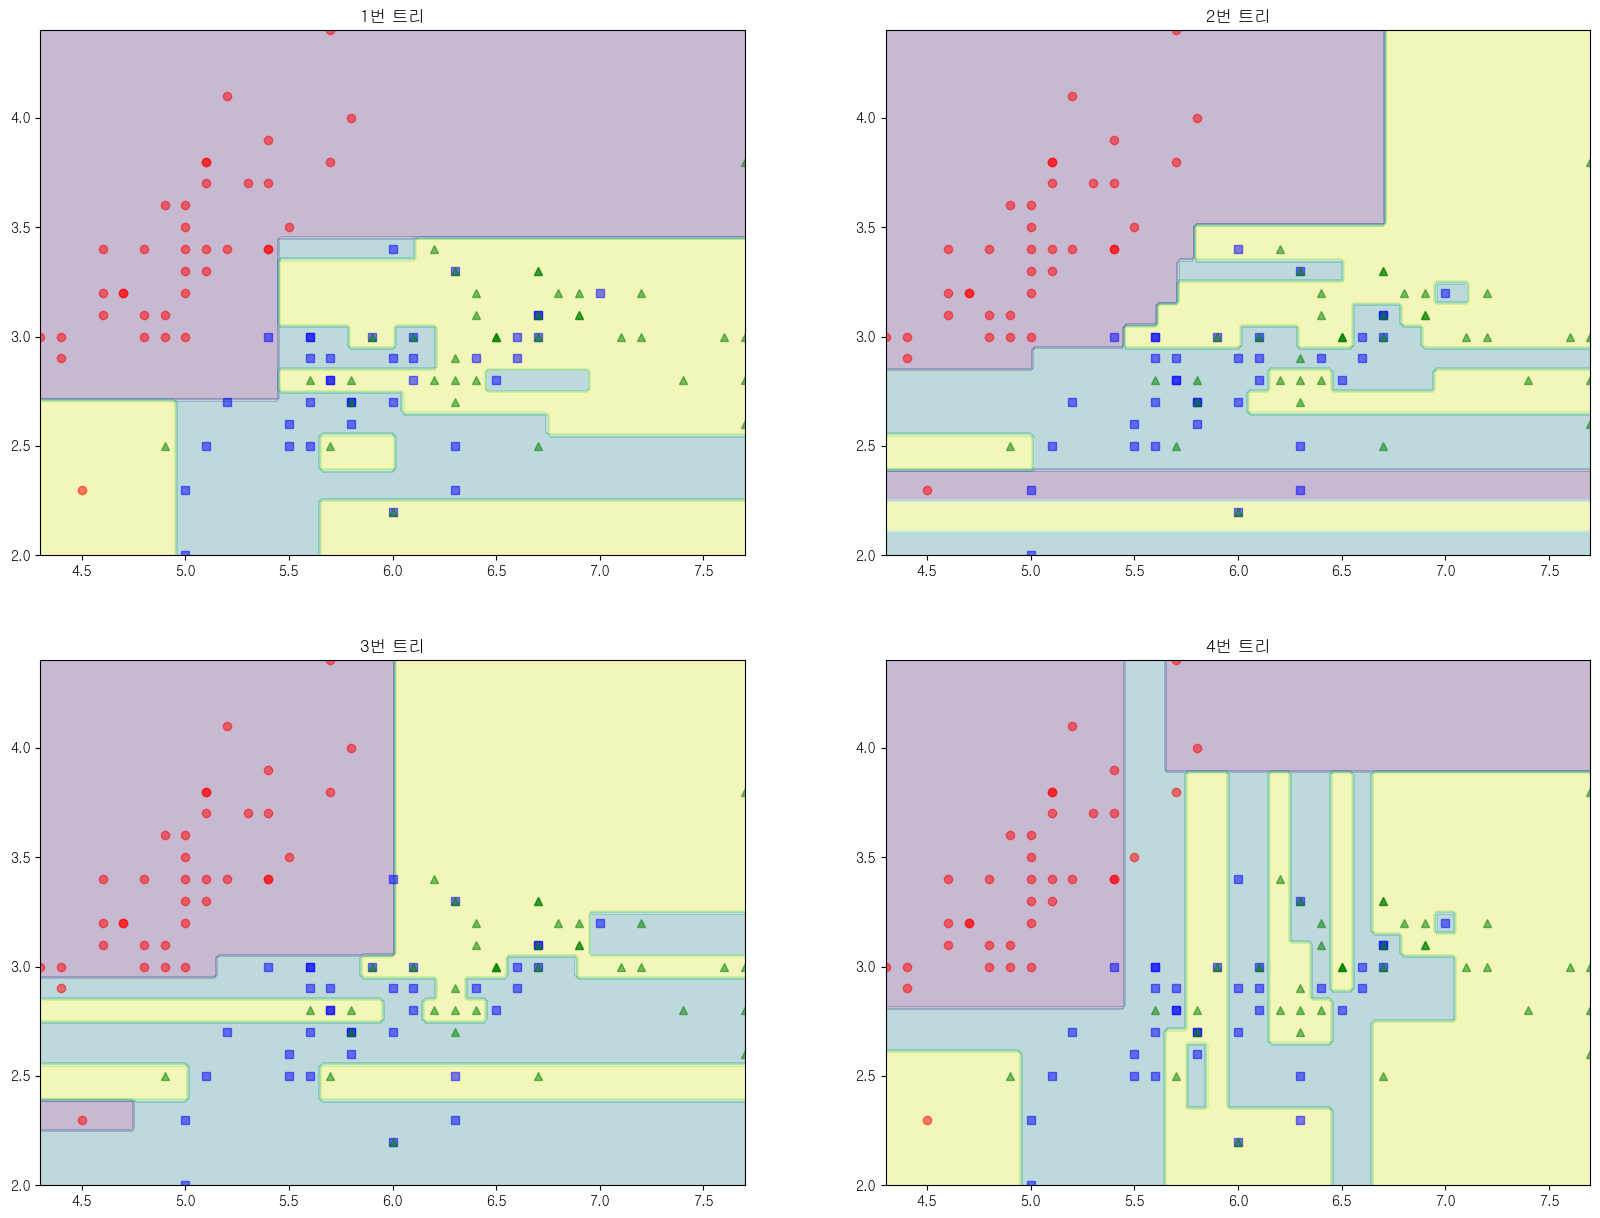

In [156]:
plt.figure(figsize = (20, 15))

plt.subplot(2,2,1)
plt.title("1번 트리")
draw_border(model_rf.estimators_[0], X_train, y_train)

plt.subplot(2,2,2)
plt.title("2번 트리")
draw_border(model_rf.estimators_[1], X_train, y_train)

plt.subplot(2,2,3)
plt.title("3번 트리")
draw_border(model_rf.estimators_[2], X_train, y_train)

plt.subplot(2,2,4)
plt.title("4번 트리")
draw_border(model_rf.estimators_[3], X_train, y_train)

In [159]:
print('train score : {:.3f}'.format(model_rf.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_rf.score(X_test, y_test)))
# 트리를 늘리면 점수도 높아지고 경계도 부드러워질것, 대신 시간이 길어짐

train score : 0.893
test score : 0.737


---
### 5. Ada Boost
- AdaBoostClassifier

에이다 부스트의 파라미터
  - base_estimator : 모델을 정해주는 파라미터이다. 값을 지정해주지 않으면 기본값으로 DecisionTreeClassifier(max_depth=1)로 설정된다.  
  - learning_rate : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 설정한다. 클수록 보정을 강하게 한다, 기본값은 1.0

In [160]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   test_size = 0.3,
                                                   shuffle = True)

In [162]:
model_ada = AdaBoostClassifier(n_estimators=9, algorithm='SAMME.R',
                              learning_rate=0.5).fit(X_train, y_train)

In [163]:
model_ada.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=984870231),
 DecisionTreeClassifier(max_depth=1, random_state=1317075483),
 DecisionTreeClassifier(max_depth=1, random_state=1390023716),
 DecisionTreeClassifier(max_depth=1, random_state=1486153797),
 DecisionTreeClassifier(max_depth=1, random_state=1978629126),
 DecisionTreeClassifier(max_depth=1, random_state=529848573),
 DecisionTreeClassifier(max_depth=1, random_state=860230235),
 DecisionTreeClassifier(max_depth=1, random_state=335605213),
 DecisionTreeClassifier(max_depth=1, random_state=1075627830)]

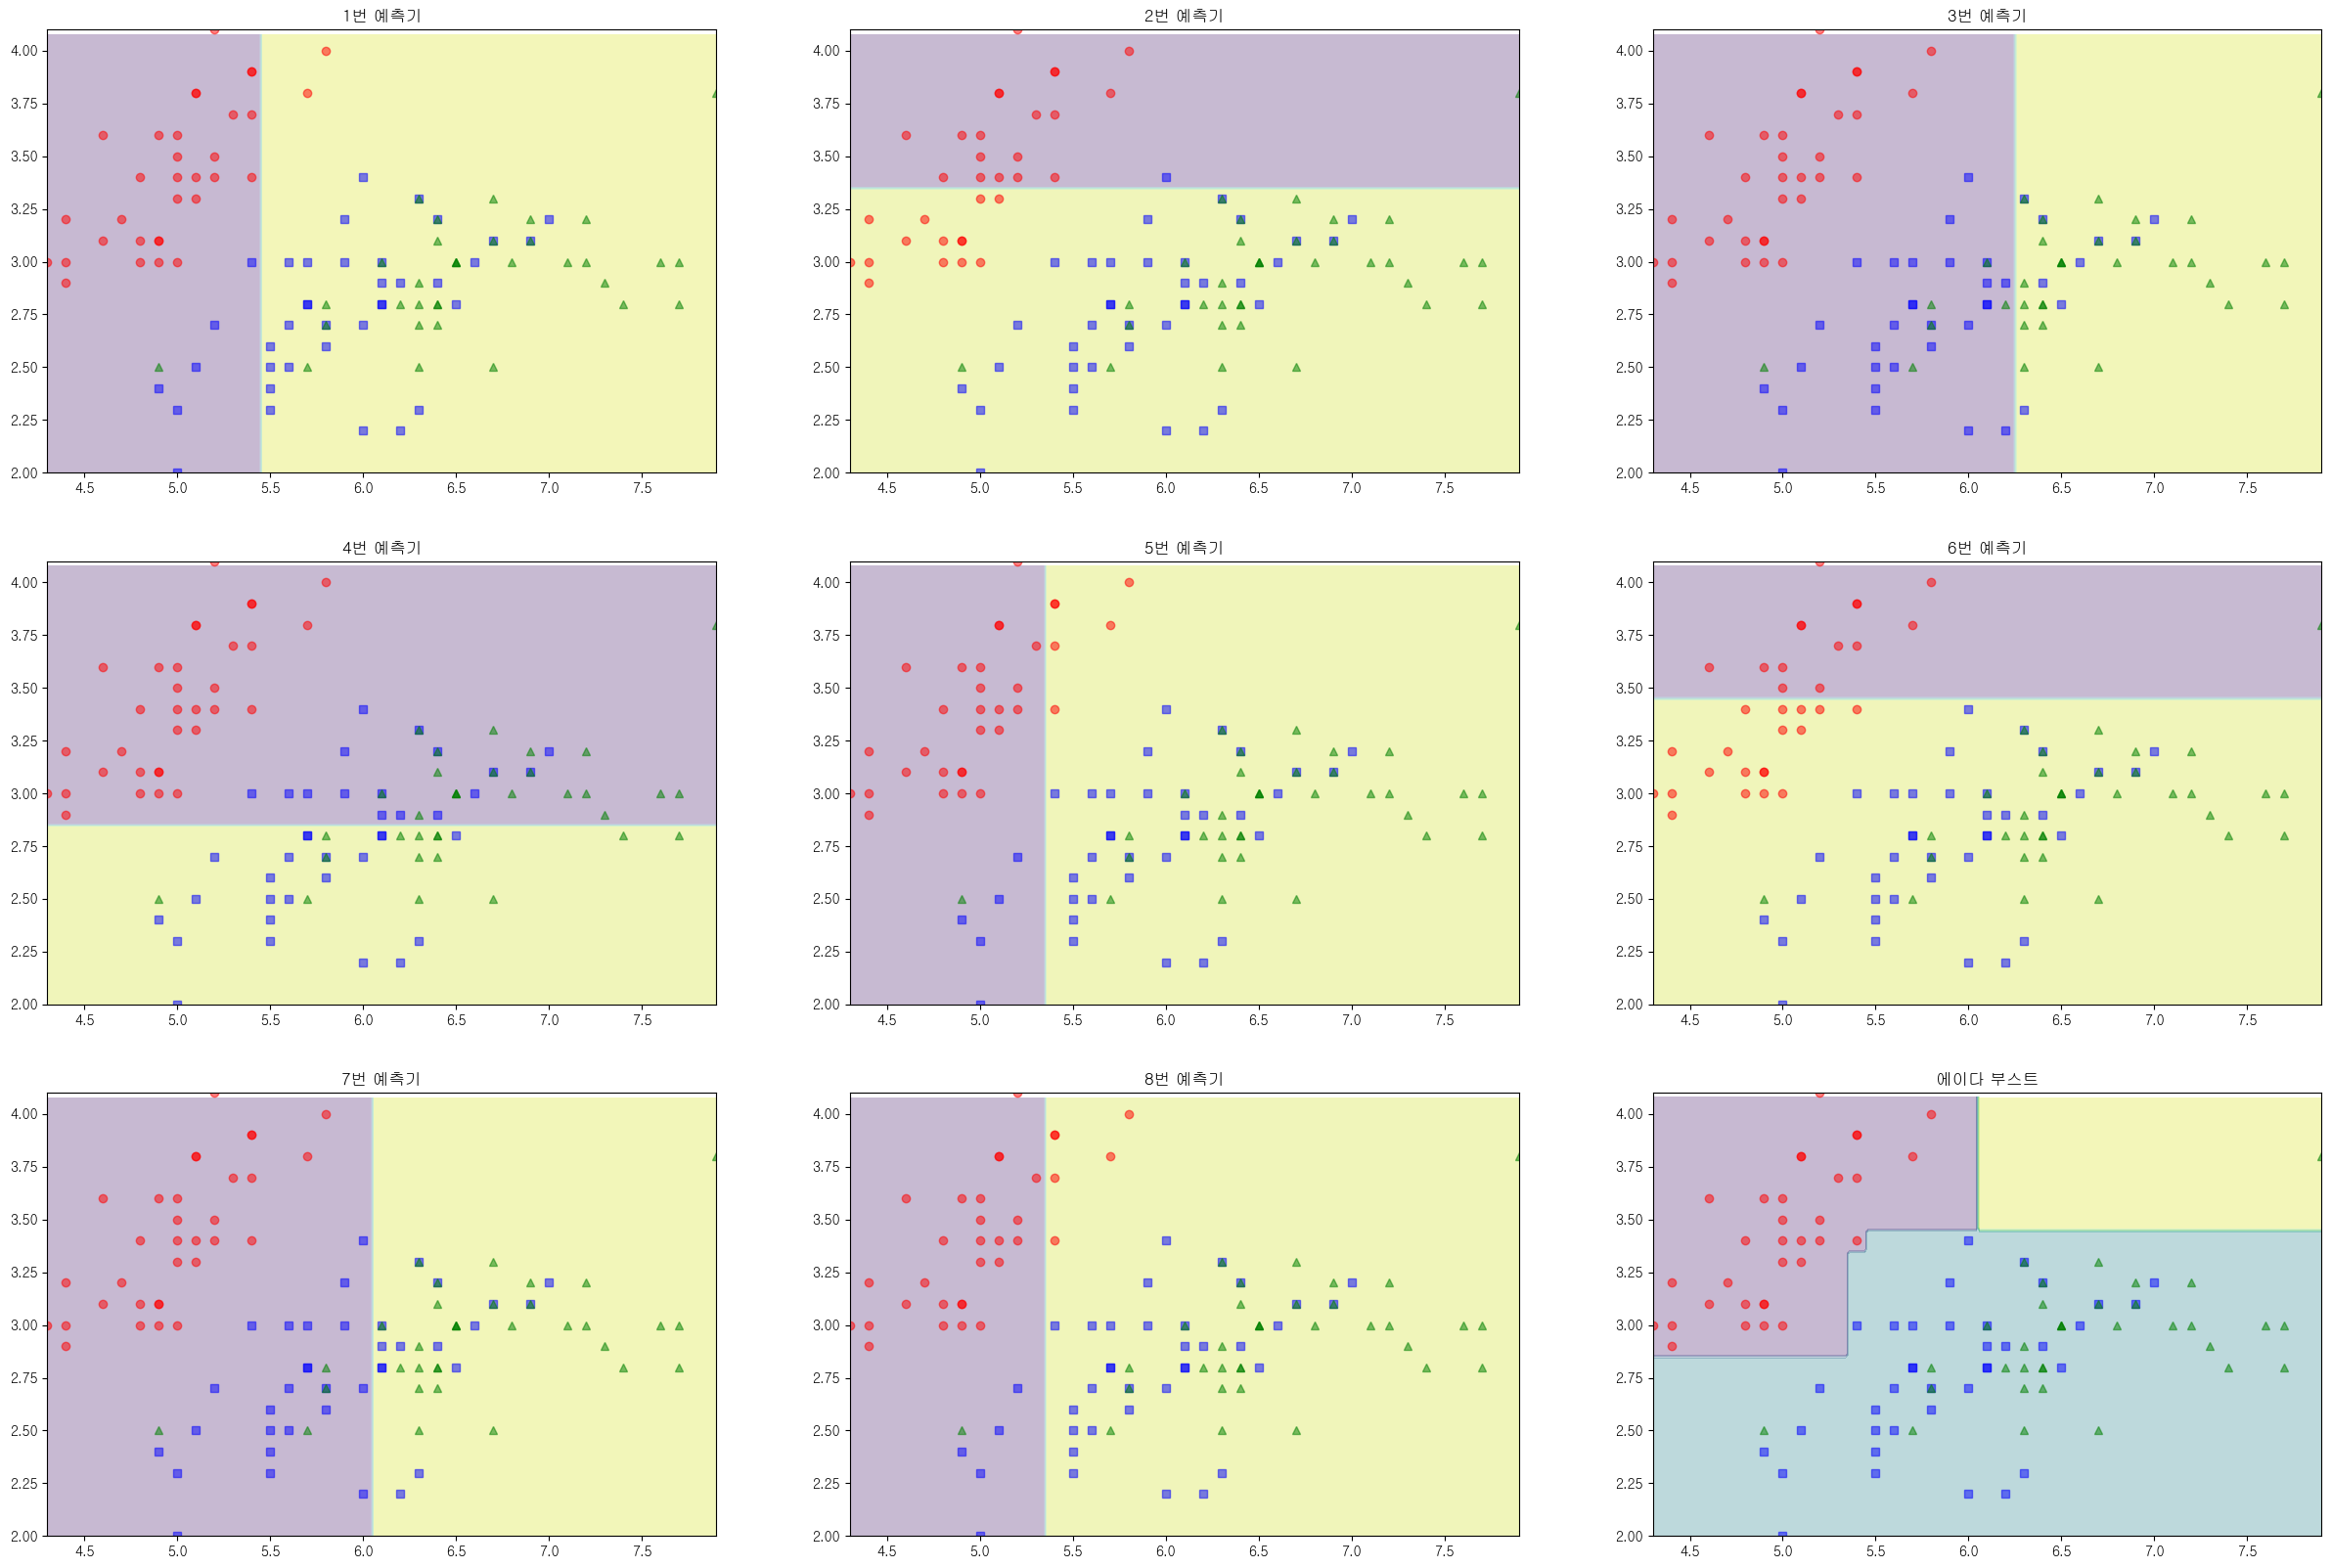

In [164]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(model_ada.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(model_ada.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(model_ada.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(model_ada.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(model_ada.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(model_ada.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(model_ada.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(model_ada.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(model_ada, X_train, y_train)

In [ ]:
model_ada.predict_proba(X_test)

In [166]:
np.argmax(model_ada.predict_proba(X_test), axis=1)
# 제일 큰 값의 인덱스, model_ada.predict(X_test)와 같은 결과일 것

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0], dtype=int64)

In [167]:
print('SAMME.R의 train score : {}'.format(model_ada.score(X_train, y_train)))
print('SAMME.R의 test score : {}'.format(model_ada.score(X_test, y_test)))

SAMME.R의 train score : 0.6857142857142857
SAMME.R의 test score : 0.6666666666666666


In [168]:
model_ada.feature_importances_

array([0.66666667, 0.33333333])

---
### 6. Gradient Boosting
- GradientBoostingClassifier
- n_estimators, learning_rate 설정 중요

그래디언트 부스팅의 파라미터
  - loss : 그래디언트 부스팅에 다른 비용 함수를 사용할 수 있다. 기본값은 로지스틱 손실 함수인 'deviance'이고 에이다부스트에서 사용하는 'exponential'도 있다.  
    - GradientBoostingRegressor에도 loss파라미터가 존재하는데 기본값은 'ls(최소제곱)'이고 'lad(최소 절댓값 오차)', 'huber(후버 손실함수)', 'quantile(사분위수 손실함수)'가 있다.
  - learning_rate : 에이다 부스트의 파라미터와 비슷하게 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 정해주는 파라미터이다. 기본값은 0.1이다.  
  - subsample : 각 트리가 훈련할 때 사용할 데이터의 비율을 지정한다. 'subsample = 0.3'이면 각 트리는 무작위로 선택된 30%의 훈련 데이터로 학습된다.
  - 결정 트리를 제어하는 파라미터인 'max_depth, min_samples_leaf' 등을 가지고 있다.

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

In [170]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state = 0)

model_grad = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

In [171]:
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

train score : 1.000
test score : 0.965


In [172]:
model_grad = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))
# max_depth 설정으로 과적합 방지

train score : 0.991
test score : 0.972


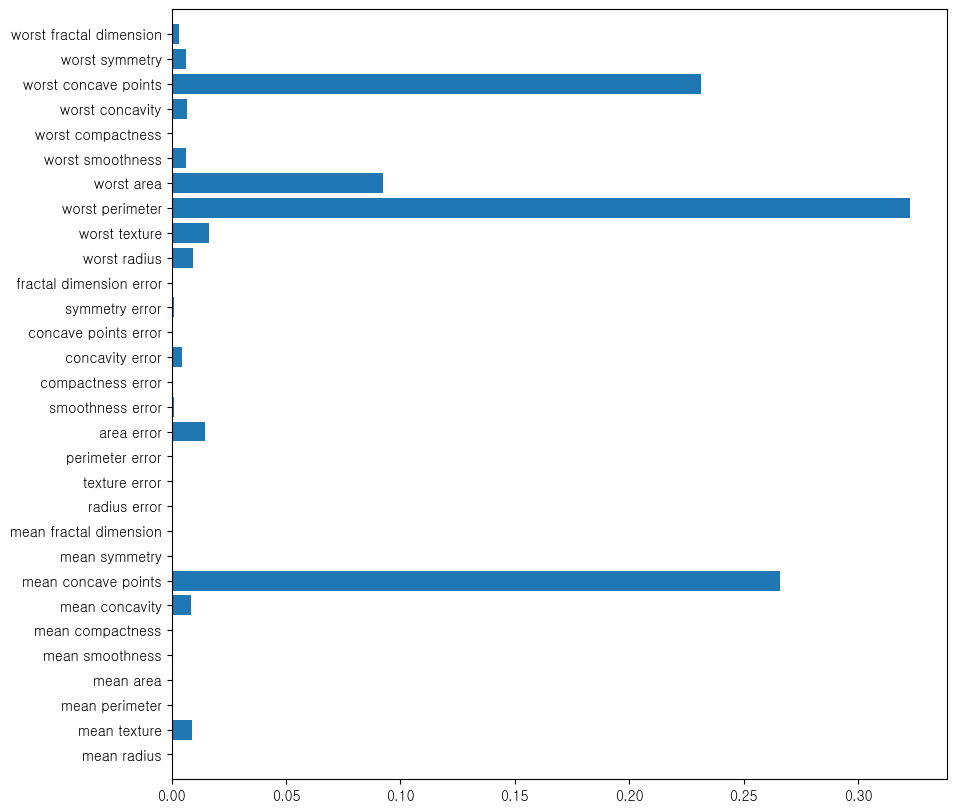

In [175]:
grbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y = grbc.feature_importances_
plt.barh(X, Y, align='center')
plt.yticks(X, cancer.feature_names)
plt.ylim(-1, cancer.data.shape[1])
plt.show()

---
### 7. XGBoost
- sklearn에서 제공 안함
- Gradient Boosting의 결정 트리 구성시 병렬 처리 이용하여 더 빠름

#### XGboost의 파라미터
- XGboost의 경우에는 파라미터를 3개의 범주로 나눈다. 일반적인 파라미터(General parameters), 부스터 파라미터(Booster parameters), 학습 과정 파라미터(Learning Task parameters)로 구성 되어있다.  

#### 1. General parameters
- booster : 어떤 부스터 구조를 쓸 것인지 정하는 파라미터이다. gbtree(결정트리), gblinear(선형모델), dart(Drop out Regression Trees)가 있고 기본값은 'gbtree'이다, gbtree의 성능이 제일 낫다.  
- n_jobs : xgboost를 실행시 병렬처리에 사용되는 코어 수, 따로 값을 주지 않으면 자동적으로 코어를 탐지하여 사용.  
- num_feature : 특성의 수를 정해줘야 하는 경우에 사용. 

#### 2. Booster parameters
- learning_rate : 가중치를 정해주는 파라미터이다.    
- gamma : 트리가 분할을 할 때 필요한 최소 손실 감소(Minimum Loss reduction)를 지정해준다, 값이 커지면 트리의 깊이가 줄어들어 보수적인 모델이 된다.  
- max_depth : 트리의 깊이를 정해주는 파라미터  
- reg_lambda : L2 norm. 값이 커질수록 모델이 보수적으로 변한다.  
- reg_alpha : L1 norm. 값이 커질수록 모델이 보수적으로 변한다. 

#### 3. Learning Task parameters
- objective : 목적함수를 정해주는 파라미터이다.  
    - binary:logistic는 이진분류, multi:softmax는 softmax는 다중 클래스 분류이다. 이 외에도 multi:softprob , rank:map 등 다양한 값들이 존재한다.  
<br>
- eval_metric : 모델의 평가 함수를 설정하는 파라미터로 회귀분석이면 'rmse', 분류 문제에는 'error'를 기본값으로 사용한다, objective에 따라 기본값이 설정되어 있다.  
    - rmse(root mean square error), mae(mean absolute error), error(Binary classification error rate) 등 여러 값들이 존재한다.  

#### 사용
- 모델 import  

    ```
    import xgboost as xgb
    model = xgb.XGBClassifier()

    ```

- fit  

    ```
    xgb_model = xgb.XGBClassifier(booster = 'gbtree',
                                learning_rate = 0.1,
                                max_depth=1).fit(X_train, y_train)
    
    ```

- objective (binary:logistic -> 이진 분류, multi:softmax -> 다중 클래스 분류)
    ```
    xgb_model.objective

    ```

- plot_importance (어떤 특성에 의존하는 지 확인)
    ```
    from xgboost import plot_importance
    fig, ax = plt.subplots(figsize = (10, 5))
    plot_importance(xgb_model, ax = ax)
    plt.show()

    ```

- plot_tree (트리 시각화)
    ```
    from xgboost import plot_tree
    fig, ax = plt.subplots(figsize = (15, 10))
    plot_tree(xgb_model, ax = ax)
    plt.show()
    
    ```

### 8. LightGBM
- sklearn에서 제공 안함
- XGBoost보다 빠른 연산, 적은 메모리
- 적어도 10000개 이상 데이터셋에서 효율적, 그 이하는 XGBoost 사용

#### LightGBM의 파라미터
- xgboost의 파라미터와 거의 동일하다.  
- max_depth : 트리의 깊이를 조정하는 파라미터  
- n_estimators : 반복할 결정 트리의 개수  
- learning_rate : 학습기 마다 가중치를 얼마나 줄 것인지를 설정하는 파라미터  
- boosting_type : xgboost의 booster파라미터와 같은 역할을 하지만 지원하는 모델이 다르다, gbdt(Gradient Boosted Decision Trees), rf(Random Forest), dart, goss(Gradient-based One-Sied Sampling)가 있다.  
    - goss는 계산속도를 줄여 주지만 예측력에서 손실이 있을 수 있다.  
- reg_alpha : L1 규제  
- reg_lambda : L2 규제

#### 사용
- 모델 import
    ```
    import lightgbm as lgb
    lgb_model = lgb.LGBMClassifier()
    
    ```

- fit
    ```
    lgb_model = lgb.LGBMClassifier(max_depth=3, n_estimators=9, 
                                learning_rate=0.1).fit(X_train, y_train)
                                
    ```

- plot_importance

- plot_tree